# Analiziranje podatkov

In [41]:
import os
import pandas as pd
import matplotlib.pyplot as plt

directory_obdelani = 'podatki-obdelani'
csv_osebe = 'osebe.csv'
csv_knjige = 'knjige.csv'
#količina izpisanih vrstic
pd.set_option("display.max_rows", 12)
# izberemo interaktivni "notebook" stil risanja
%matplotlib inline
path_osebe = os.path.join(directory_obdelani, csv_osebe)
osebe = pd.read_csv(path_osebe)
osebe.index += 1

path_knjige = os.path.join(directory_obdelani, csv_knjige)
knjige = pd.read_csv(path_knjige)
knjige.index += 1

## 1.Osnovne informacije

### Razpredelnica - osebe

In [42]:
osebe

,ime,pojavljanje,opis
1,A'Karonys,GotM,High Mage of the Malazan Empire
2,Abide,CG,"Pure Forkrul Assail, lawful inquisitor, mystic"
3,Able,HoC,Soldier in the Bonehunters
4,Abrastal,"DoD, CG",Queen of Bolkando
5,Absi,"DoD, CG",Son of Onos T'oolan (Tool) and Hetan
...,...,...,...
690,Withal,"MT, BH, RG, DoD, CG",A Meckros Weaponsmith who briefly works for th...
691,Wither,"MT, RG",Shadow wraith
692,Wu,"DL, DhL",Dal Hon mage that would later take the name Ke...
693,Yan Tovis,"MT, BH, RG, DoD, CG","Letherii Atri-Preda at Feint Reach, also calle..."


### Razpredelnica - knjige

In [43]:
knjige

,ime,kratica
1,Gardens of the Moon,GotM
2,Deadhouse Gates,DG
3,Memories of Ice,MoI
4,House of Chains,HoC
5,Midnight Tides,MT
...,...,...
12,Return of the Crimson Guard,RotCG
13,Stonewielder,SW
14,Blood and Bone,BB
15,Orb Sceptre Throne,OST


### Osnovne statistike

In [44]:
osebe.describe()

,ime,pojavljanje,opis
count,694,693,694
unique,694,132,505
top,A'Karonys,MoI,Soldier in the Bonehunters
freq,1,67,44


## 2.Tabele

### Pogostost začetnic

In [45]:
zacetnice_ponovitve = {}
for i in "ABCDEFGHIJKLMNOPRSTUVWXYZ":
    zacetnice_ponovitve[i] = 0
    for j in osebe['ime']:
        if i == j[0]:
            zacetnice_ponovitve[i] += 1
            
zacetnice = {'začetnice':list(zacetnice_ponovitve.keys()), 'ponovitve':list(zacetnice_ponovitve.values())}
zacetnice_pd = pd.DataFrame.from_dict(zacetnice)
zacetnice_pd.index += 1
zacetnice_pd

,začetnice,ponovitve
1,A,31
2,B,70
3,C,32
4,D,24
5,E,13
...,...,...
21,V,10
22,W,6
23,X,0
24,Y,2


### Pojavitve po knjigi

In [46]:
knjige_ponovitve = {}
for j in knjige['kratica']:
    knjige_ponovitve[j] = 0
    for k in osebe['pojavljanje']:
        if str(j) in str(k):
            knjige_ponovitve[j] += 1

knjige_ = {'knjige':list(knjige_ponovitve.keys()), 'ponovitve':list(knjige_ponovitve.values())}
knjige_pd = pd.DataFrame.from_dict(knjige_)
knjige_pd.index += 1
knjige_pd

,knjige,ponovitve
1,GotM,88
2,DG,92
3,MoI,118
4,HoC,135
5,MT,90
...,...,...
12,RotCG,7
13,SW,5
14,BB,2
15,OST,19


### Število pojavitev v knjigah

In [65]:
st_pojavitev = {}
for i in osebe.index:
    x = str(osebe.loc[i]['pojavljanje']).count(' ')
    st_pojavitev[osebe.loc[i]['ime']] = x + 1  

st_pojavitev_ = {'knjige':list(st_pojavitev.keys()), 'ponovitve':list(st_pojavitev.values())}
st_pojavitev_v_knjigah = pd.DataFrame.from_dict(st_pojavitev_)
st_pojavitev_v_knjigah.index += 1
st_pojavitev_v_knjigah

,knjige,ponovitve
1,A'Karonys,1
2,Abide,1
3,Able,1
4,Abrastal,2
5,Absi,2
...,...,...
690,Withal,5
691,Wither,2
692,Wu,2
693,Yan Tovis,5


### Pojavitve imen v opisih

In [47]:
imena_ponovitve = {}
for j in osebe['ime']:
    imena_ponovitve[j] = 0
    for k in osebe['opis']:
        if str(j) in str(k):
            imena_ponovitve[j] += 1

imena = {'ime':list(imena_ponovitve.keys()), 'pojavitve':list(imena_ponovitve.values())}
imena_pd = pd.DataFrame.from_dict(imena)
imena_pd.index += 1
imena_pd

,ime,pojavitve
1,A'Karonys,0
2,Abide,0
3,Able,0
4,Abrastal,1
5,Absi,1
...,...,...
690,Withal,1
691,Wither,0
692,Wu,0
693,Yan Tovis,2


In [48]:
imena_pd.sort_values(by=['pojavitve'], ascending=False).head(10)

,ime,pojavitve
14,Anomander Rake,10
339,Lady Envy,8
263,Hunt,8
98,Burn,7
308,Karsa Orlong,6
676,Uruth,6
252,Hetan,6
420,Nimander Golit,4
357,Logros,4
565,Silgar,4


## 3. Grafi

### Graf začetnic

<Axes: >

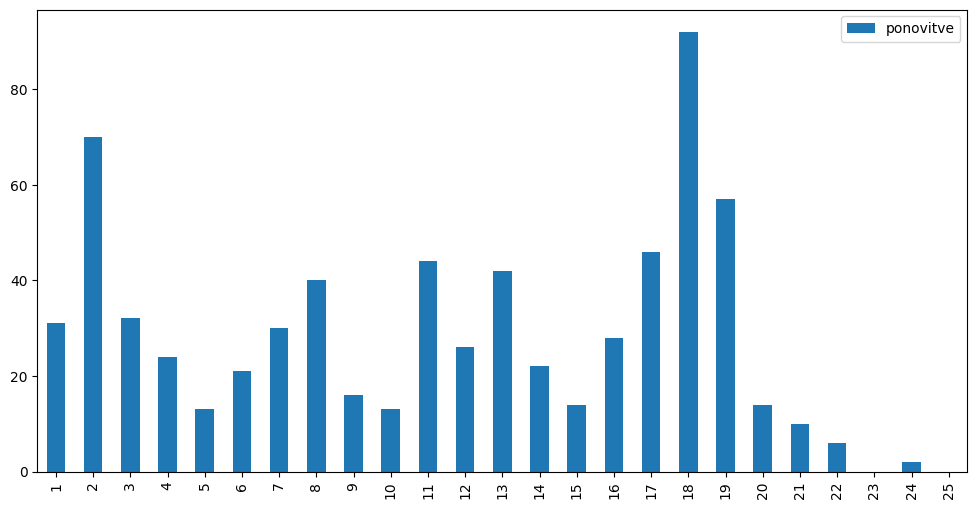

In [55]:
zacetnice_pd.plot.bar(figsize=(12, 6))

### Graf pojavitve v knjigah

<Axes: >

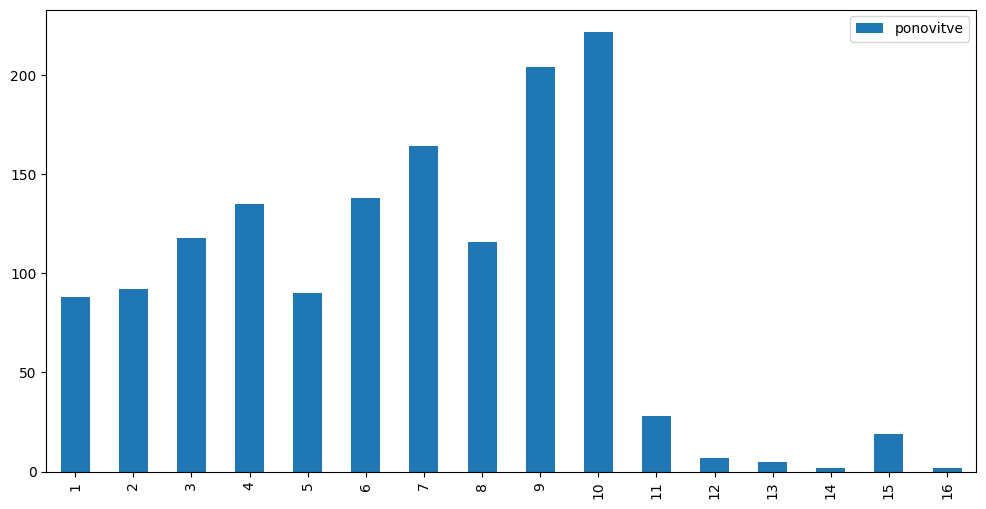

In [66]:
knjige_pd.plot.bar(figsize=(12, 6))